# DATS 6103 – Individual Project 2 – Poornima Joshi 




This case study involves mining the data of two most leading mobile markets - Google Inc.'s Play store and Apple Inc.'s App store. The aim is understand and explore the factors which affect the popularity in order to develop competitive applications, understand where to invest time or money, and succeed in the business world.

In [3]:
# Importing the packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

import seaborn as sns # for making plots with seaborn
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
color = sns.color_palette()

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

The data used in this analysis is extracted from kaggle and both files are in csv format.

In [4]:
# Importing the two datasets
google = pd.read_csv("googleplaystore.csv")
apple = pd.read_csv("AppleStore.csv")
apple_description = pd.read_csv('appleStore_description.csv')

### Cleaning the Google's playstore dataset
1. Convert all app sizes to MB
2. Remove '+' from 'Number of Installs' to make it numeric
3. Convert all review text to English language using Google Translator library
4. Dropping duplicates
5. Removing NaN values

In [5]:
google.drop_duplicates(subset='App', inplace=True)
google = google[google['Android Ver'] != np.nan]
google = google[google['Android Ver'] != 'NaN']
google = google[google['Installs'] != 'Free']
google = google[google['Installs'] != 'Paid']

In [6]:
google['Installs'] = google['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: int(x))

google['Size'] = google['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
google['Size'] = google['Size'].apply(lambda x: float(x))
google['Installs'] = google['Installs'].apply(lambda x: float(x))

google['Price'] = google['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google['Price'] = google['Price'].apply(lambda x: float(x))
google['Reviews'] = google['Reviews'].apply(lambda x: int(x))

google['Current Ver'] = google['Current Ver'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
google['Current Ver'] = google['Current Ver'].str[0:3]
#google['Current Ver'] = google['Current Ver'].apply(lambda x: float(x))

print('Number of apps in the google play store dataset is : ' , len(google))

Number of apps in the google play store dataset is :  9659


### Cleaning the Apple's App store dataset
1. Convert all app sizes to MB
2. Remove '+' from 'Number of Installs' to make it numeric
3. Dropping duplicates
4. Removing NaN values

In [7]:
apple['app_desc'] = apple_description['app_desc']
apple.drop(['Unnamed: 0'], axis=1, inplace=True)
apple['size_bytes'] = apple['size_bytes'] / (1024 * 1024.0)
apple.drop_duplicates(subset='id', inplace=True)

In [8]:
print('Number of apps in the apple app store dataset is : ' , len(apple))

Number of apps in the apple app store dataset is :  7197


### Understanding our Google play store data a little bit more:
1. Which categories of data have highest number of apps
2. How free v/s paid apps are there
3. Box plot for features of our interest
4. Distribution of rating

In [9]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
number_of_apps_in_category_google = google['Genres'].value_counts().sort_values(ascending=True)
data = [go.Pie(
        labels = number_of_apps_in_category_google.index,
        values = number_of_apps_in_category_google.values,
        hoverinfo = 'label+value' 
)]
plotly.offline.iplot(data, filename='basic_pie_chart')

In [11]:
# Apps in different categories
number_of_apps_in_category_google = google['Category'].value_counts().sort_values(ascending=True)
data = [go.Pie(
        labels = number_of_apps_in_category_google.index,
        values = number_of_apps_in_category_google.values,
        hoverinfo = 'label+value' 
)]
plotly.offline.iplot(data, filename='active_category')

Family, Game, Tools, Business, Medical, Personalization, Productivity and Lifestyle form the top 50% of the apps

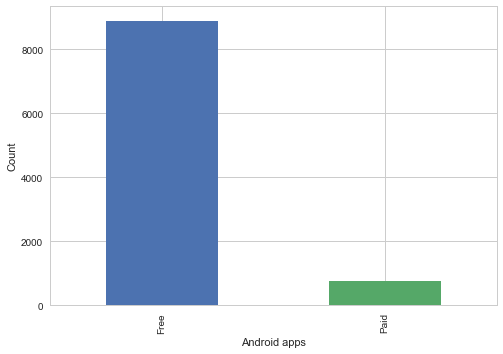

In [12]:
# Number of free and paid apps in Google's PlayStore
type = google['Type'].value_counts().plot.bar()
plt.xlabel('Android apps')
plt.ylabel('Count')
plt.show()

20.39528931451608

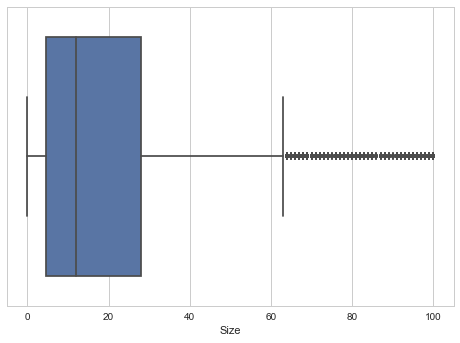

In [13]:
# Size of the app (apk file)
size_google = google['Size']
sns.set(style="whitegrid")
ax = sns.boxplot(x=size_google)
google['Size'].mean()

482.95

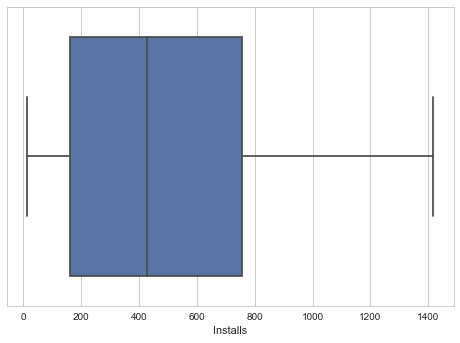

In [14]:
# Number of installations of all apps in Google Playstore
install = google['Installs'].value_counts()
sns.set(style="whitegrid")
ax = sns.boxplot(x=install)
install.mean()

#### Since 'popularity' is our feature of interest, let us look at the distribution of ratings in Google store
We can observe below that a majority of ratings are slightly greater than 4.0

Text(0.5,1,'Distribution of Rating')

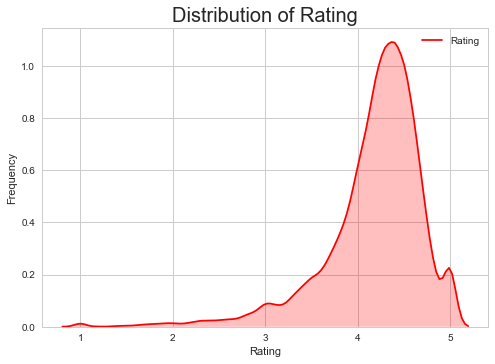

In [15]:
# rating distibution 
g = sns.kdeplot(google.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Let us now repeat the same in Apple's App Store
### Understanding our Apple's App store data a little bit more:
1. Which categories of data have highest number of apps
2. How free v/s paid apps are there
3. Box plot for features of our interest


In [16]:
apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,96.119141,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,151.232422,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",95.867188,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",122.558594,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,88.476562,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [17]:
number_of_apps_in_category_apple = apple['prime_genre'].value_counts().sort_values(ascending=True)
data = [go.Pie(
        labels = number_of_apps_in_category_apple.index,
        values = number_of_apps_in_category_apple.values,
        hoverinfo = 'label+value' 
)]
plotly.offline.iplot(data, filename='active_category')

Games for the top 50% of the apps, closely followed by entertainment and education.

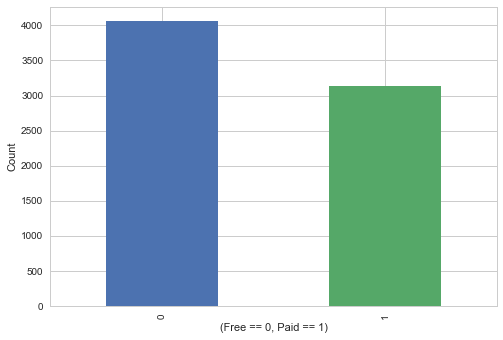

In [18]:
# Pricing of apps in Apple store
apple['Paid'] = apple['price'].apply(lambda x: 1 if x > 0 else 0)
apple['Paid'].value_counts().plot.bar()
plt.xlabel('(Free == 0, Paid == 1)')
plt.ylabel('Count')
plt.show()

189.90941412455177

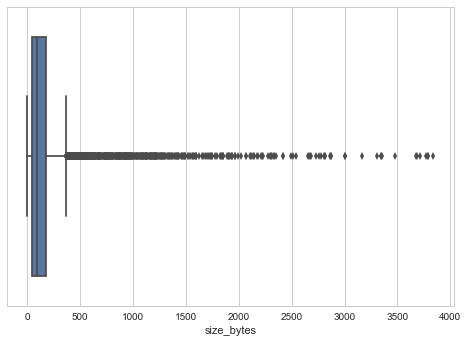

In [19]:
# Size of the app
size_apple = apple['size_bytes']
sns.set(style="whitegrid")
ax = sns.boxplot(x=size_apple)
size_apple.mean()

#### Since 'popularity' is our feature of interest, let us look at the distribution of ratings in App store
We can observe below that a majority of ratings are around than 4.5 and some even have 0 ratings

Text(0.5,1,'Distribution of Rating')

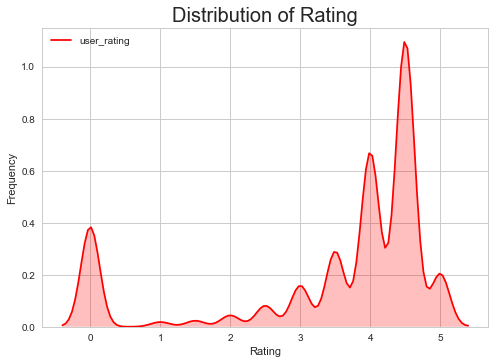

In [20]:
# rating distibution 
g = sns.kdeplot(apple.user_rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

### RQ #1: 
Does popularity correlate with the characteristics of an app like number of installations and number of ratings? This investigation is essential to check whether these factors can be improved to increase an app's popularity.


Text(0.5,1,'Rating v/s Installs in Android')

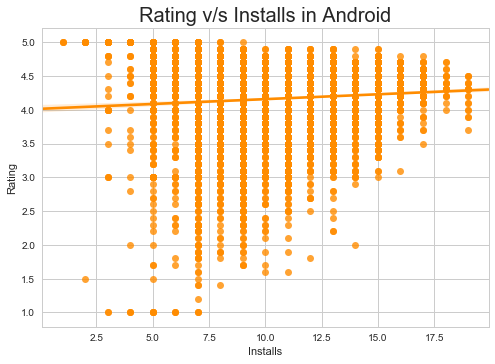

In [21]:
#Encoding the installs by order of size: 
#Ex: 0 refer to 1+
#    1 refer to 5+
#    2 refer  to 10+
sorted_installs_google = sorted(list(google['Installs'].unique()))
google['Installs'].replace(sorted_installs_google,range(0,len(sorted_installs_google),1), inplace = True )
sns.regplot(x="Installs", y="Rating", color = 'darkorange',data=google);
plt.title('Rating v/s Installs in Android',size = 20)

Text(0.5,1,'Rating v/s Number of Ratings in IOS')

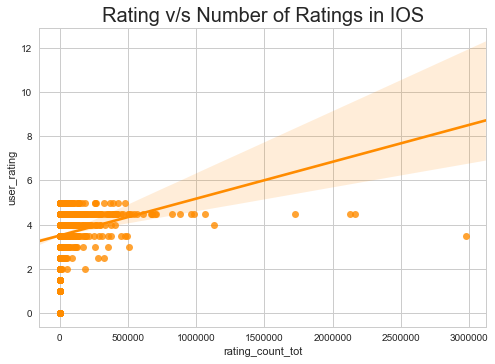

In [22]:
# Using number of ratings as an indicator for number of installs
sns.regplot(x="rating_count_tot", y="user_rating", color = 'darkorange',data=apple[apple['user_rating'] < 1000000]);
plt.title('Rating v/s Number of Ratings in IOS',size = 20)

### RQ #2: 
How does popularity vary per genre, application size, and price? The goal here is to provide an initial view about the popularity of the apps, by comparing the average user ratings within the groups of genre - Sports, Health, Education etc., application size - Small, Medium or Large, and price - paid or free version of the application.

### How does popularity vary per genre

Text(0.5,1,'Count of app in each category')

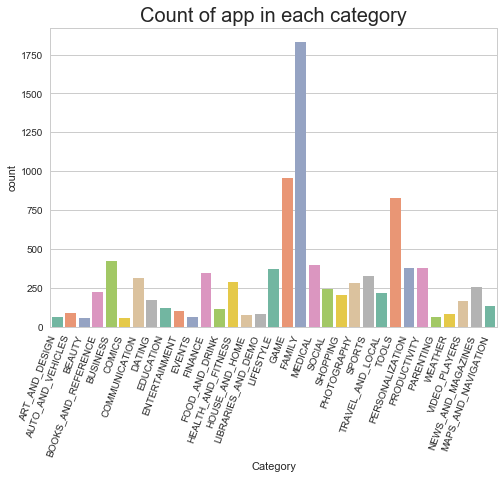

In [23]:
g = sns.countplot(x="Category",data=google, palette = "Set2")
g.set_xticklabels(g.get_xticklabels(), rotation=70, ha="right")
plt.title('Count of app in each category',size = 20)

In [24]:
# Play store ratings in different categories
# We aim to see if certain categories have very high ratings
category_google = google.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
print('Average rating = ', np.nanmean(list(category_google.Rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(category_google.Category)))]

layout = {'title' : 'App ratings in Play Store across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(category_google.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(category_google.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }
categorgy_plot = [{'y': google.loc[google.Category==category]['Rating'],'type':'box','name' : category,'showlegend':False,} for i,category in enumerate(list(set(category_google.Category)))]

plotly.offline.iplot({'data': categorgy_plot, 'layout': layout})

Average rating =  4.170026786973072


Most app categories performing reasonably well with medians lying around the overall average. 
1. Health_and_Fitness and Books_and_Reference are outstanding with 50% apps having greater than 4.5 rating.
2. On the other end, 50% of apps in the Dating category have a rating lesser than the average rating.
This would make us believe that these categories are saturated markets.

#### In App Store

Text(0.5,1,'Count of app in each genre')

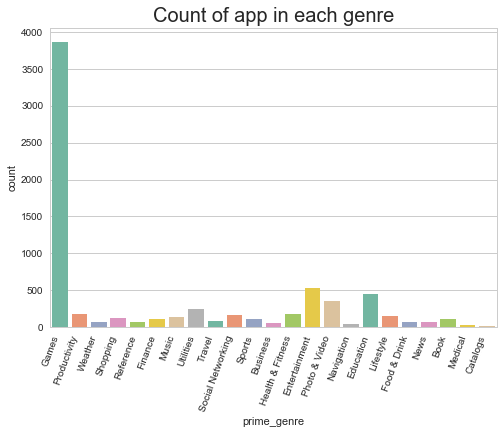

In [25]:
g = sns.countplot(x="prime_genre",data=apple, palette = "Set2")
g.set_xticklabels(g.get_xticklabels(), rotation=70, ha="right")
plt.title('Count of app in each genre',size = 20)

In [26]:
# App store ratings in different categories
# We aim to see if certain categories have very high ratings
category_apple = apple.groupby('prime_genre').filter(lambda x: len(x) >= 120).reset_index()
print('Average rating = ', np.nanmean(list(category_apple.user_rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(category_apple.prime_genre)))]

layout = {'title' : 'App ratings in App Store across major genres',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(category_apple.user_rating)),
              'x1': 19,
              'y1': np.nanmean(list(category_apple.user_rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }
categorgy_plot = [{'y': apple.loc[apple.prime_genre==category]['user_rating'],'type':'box','name' : category,'showlegend':False,} for i,category in enumerate(list(set(category_apple.prime_genre)))]

plotly.offline.iplot({'data': categorgy_plot, 'layout': layout})

Average rating =  3.5915934755332497


Most app categories performing reasonably ok with medians lying around the overall average, however not as well as android apps when comparing with the averages. 
1. Productivity, Shopping, Health_and_Fitness and Education are outstanding with 50% apps having greater than 4.5 rating.
2. On the other end, 50% of apps in the Social Networking have a rating lesser than the average rating.
This would make us believe that these categories are saturated markets.

### How does popularity vary by price

#### In Android

In [27]:
print(google['Price'].describe())

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64


In [28]:
google[google['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,9.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0,4.1 and up


Text(0.5,1,'Scatter plot Rating v/s Price')

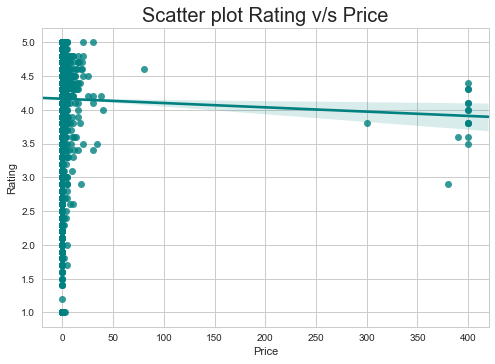

In [29]:
p = sns.regplot(x="Price", y="Rating", color = 'teal',data=google[google['Reviews']<1000000]);
plt.title('Scatter plot Rating v/s Price',size = 20)

A slight negative correlation can be observed. Therefore, increasing the price of app doesnot help in making it popular would be our most obvious conclusion. However, majority of apps are within the $50 range. If we would dive deep and observe. We see below a positive correlation. Paying a price for the app essentially mean there is a higher quality involved.

Text(0.5,1,'Scatter plot Rating v/s Price in Play store')

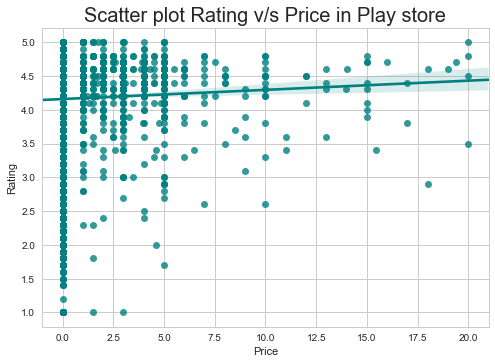

In [30]:
data = google[google['Reviews']<1000000]
sns.regplot(x="Price", y="Rating", color = 'teal',data=data[data['Price']<20]);
plt.title('Scatter plot Rating v/s Price in Play store',size = 20)

#### In IOS

In [31]:
print(apple['price'].describe())

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64


In [32]:
apple[apple['price'] > 299]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,Paid
1479,551215116,LAMP Words For Life,556.243164,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1,LAMP Words For Life™ is a full English vocabul...,1


There is a positive correlation for price and ratings. The main take away would be that people don't mind paying a price a better quality product

Text(0.5,1,'Scatter plot Rating v/s Price in App store')

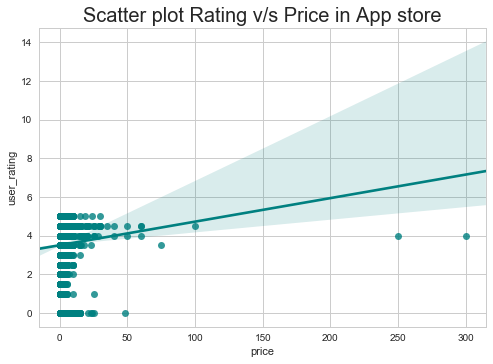

In [33]:
sns.regplot(x="price", y="user_rating", color = 'teal',data=apple[apple['rating_count_tot']<1000000]);
plt.title('Scatter plot Rating v/s Price in App store',size = 20)

Text(0.5,1,'Scatter plot Rating v/s Price in App store')

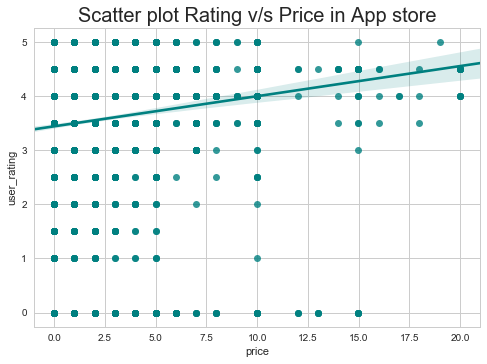

In [34]:
data = apple[apple['rating_count_tot']<1000000]
sns.regplot(x="price", y="user_rating", color = 'teal',data=data[data['price']<20]);
plt.title('Scatter plot Rating v/s Price in App store',size = 20)

Interestingly, between 0 USD - 20 USD, there is a positive correlation between price and rating. It indicates that users are willing to pay a price for high quality apps.

### How does popularity vary by app size

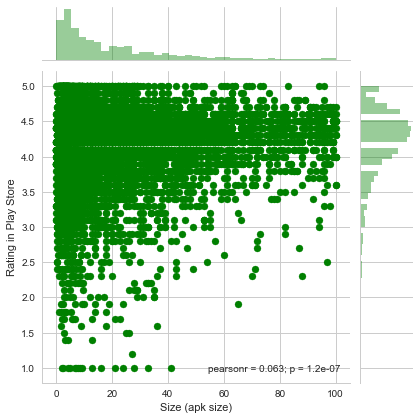

In [35]:
x, y = pd.Series(google['Size'], name="Size (apk size)"), pd.Series(google['Rating'], name="Rating in Play Store")
#ax = sns.jointplot(google['Size'], google['Rating'],color="g")
ax = sns.jointplot(x, y,color="g")

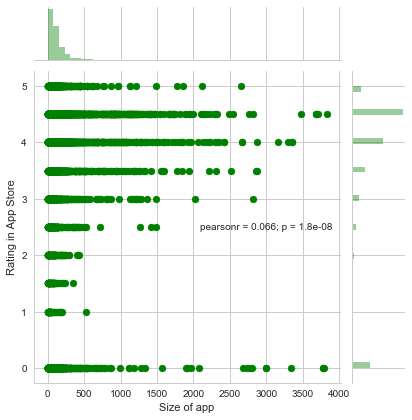

In [36]:
x, y = pd.Series(apple['size_bytes'], name="Size of app "), pd.Series(apple['user_rating'], name="Rating in App Store")
ax = sns.jointplot(x, y,color="g")

### RQ #3: 
What is the impact that new versions have on popularity of an application? This study can demonstrate if relevant gains in popularity happen due to new versions of the application.

#### In Android

In [37]:
google['Current Ver']  = pd.to_numeric(google['Current Ver'], errors='coerce')
google['Current Ver'] = google['Current Ver'].astype(float)

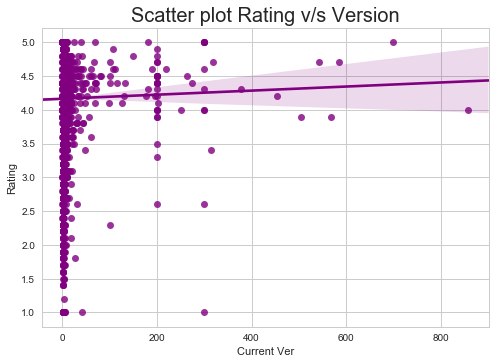

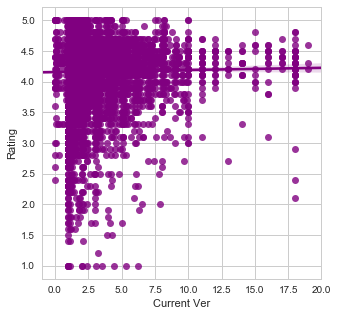

In [38]:
sns.regplot(x="Current Ver", y="Rating", color = 'purple',data=google);
#sns.regplot(x="Current Ver", y="Rating", color = 'purple',data=google[google['Current Ver']<30]);
plt.title('Scatter plot Rating v/s Version',size = 20)

plt.figure(figsize = (5,5))
sns.regplot(x="Current Ver", y="Rating", color = 'purple',data=google[google['Current Ver']<20]);

On an overview, there seems to be sight positive correlation with Version and Rating. However, significant amount of apps have versions between 0 and 20. In the second plot, we have focussed on these subset of apps. It indicates nearly no correlation between releasing versions and being more popular in Play Store.

#### In IOS

In [39]:
#apple['ver'] = apple['ver'].str[0:3]
apple['ver']   = pd.to_numeric(apple['ver'], errors='coerce')
apple['ver'] = apple['ver'].astype(float)

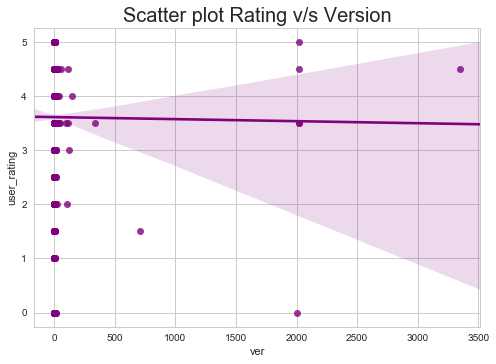

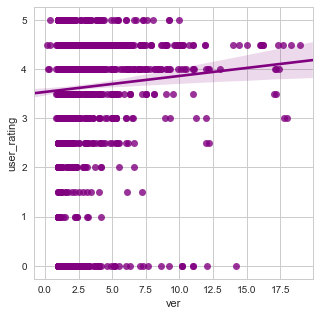

In [40]:
sns.regplot(x="ver", y="user_rating", color = 'purple',data=apple);
plt.title('Scatter plot Rating v/s Version',size = 20)

plt.figure(figsize = (5,5))
sns.regplot(x="ver", y="user_rating", color = 'purple',data=apple[apple['ver']<20]);

There is positive correlation between user rating and releasing versions. It indicates that in App store, versions are significantly improving products.

### In conclusion:
RQ #1:
Does popularity correlate with the characteristics of an app like number of installations and number of ratings? 
Yes, there is positive correlation between number of installations or number of ratings and the popularity. Higher the rating, it is more likely the user installs. 

RQ #2:
How does popularity vary per genre, application size, and price?
1. Popularity vary per genre: Games is a category, that is performing well in both in Android as well as IOS apps. Health & fitness and education/ books are generally high rated. Dating apps have low average rating in both Android and IOS apps.
2. Popularity vary by application size: In android apps, there is no correlation between size of an app and rating. However, in IOS apps, the larger the apps are, higher ratings are observed.
3. Popularity vary with price: Interestingly, between 0 - 20 USD, there is a positive correlation between price and rating. It indicates that users are willing to pay a price for high quality apps.

RQ #3:
What is the impact that new versions have on popularity of an application? 
New versions have no impact on popularity in Android apps, however in IOS apps, as the number of versions increase popularity has gradually increased.